**<center>* Assignment 11: TEXT MINING   *</center>**

DATASCIENCE

name: GUVVALA SOMASEKHAR REDDY

mail: showmove5697@gmail.com

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import string # special operations on strings
import spacy # language models
import re
from wordcloud import WordCloud

In [ ]:
## command through anaconda command prompt
!python -m spacy download en

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-14 09:55:14.477153: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-14 09:55:14.477357: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-14 09:55:14.477382: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

#Problem-1)

Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

#Solution:

In [ ]:
#data loading
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk (1).csv


In [ ]:
pd.set_option('display.max_rows', 10)
elon_musk=pd.read_csv('Elon_musk.csv',index_col=0,encoding='ISO-8859-1')
elon_musk

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1995,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1996,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


##Basic & EDA

In [ ]:
elon_musk.shape

(1999, 1)

In [ ]:
elon_musk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [ ]:
elon_musk.isna().sum()

Text    0
dtype: int64

*  There is no null values in the dataset.

In [ ]:
elon_musk.duplicated().value_counts()

False    1997
True        2
dtype: int64

In [ ]:
elon_musk[elon_musk.duplicated()]

,Text
325,The most entertaining outcome is the most likely
656,@westcoastbill Indeed


In [ ]:
#removing duplicate records
elon_musk_cln=elon_musk.drop_duplicates().reset_index()
elon_musk_cln=elon_musk_cln.drop('index',axis=1)
elon_musk_cln

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1992,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1993,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1994,@TeslaGong @PPathole Samwise Gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [ ]:
elon_musk_cln.value_counts()

Text                                                                                                                                            
.@TheBabylonBee is savage <U+0001F923><U+0001F923>                                                                                                  1
@picot_john @CyberpunkGame Its a good to great game imo, but improving what may seem like mere surface detail woul
 https://t.co/zm0SZ9CbZg        1
@renarddemoscou @BillGates Sorry to hear this. What can we do to help?                                                                              1
@reganlovetesla @RenataKonkoly @SpaceNews_Inc Enough already on my plate &amp; Teslas. Maybe one day will do a prototy
 https://t.co/tGPWEJ7WQA    1
@redmercy Yes                                                                                                                                       1
                                                                                                         

*  Since we have only one feature and we removed duplicate observations, there will be only unique observations in the dataset.

##Text cleaning

In [ ]:
elon_musk_cln.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!


In [ ]:
#regular expression
import re 
import string

def clean_text(text):
  text=text.lower()
  text=re.sub('\[.*?\']','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub("[0-9" "]+"," ",text)
  text=re.sub('[‘’“”…]','',text)
  text=re.sub("  ",'',text)
  return text

clean=lambda x:clean_text(x)

In [ ]:
elon_musk_cln["Text"] = elon_musk_cln["Text"].apply(clean_text) # Clean The Text
elon_musk_cln

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazing execution last year now on to the next for even more
...,...
1992,flcnhvy true it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me
1993,ppathole make sure to read ur terms amp conditions before clicking accept
1994,teslagong ppathole samwise gamgee
1995,ppathole altho dumb and dumber is


In [ ]:
#word frequency
#top 20
freq=pd.Series(''.join(elon_musk_cln['Text']).split()).value_counts()[:25]
freq

the               473
to                399
is                352
a                 351
of                312
                 ... 
are                99
erdayastronaut     98
at                 93
you                85
and                84
Length: 25, dtype: int64

In [ ]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')
elon_musk_cln['Text']=elon_musk_cln['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
elon_musk_cln

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextlevel tried
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing execution last year next even
...,...
1992,flcnhvy true sounds surreal negative propaganda still amp easy find social
1993,ppathole make sure read ur terms amp conditions clicking accept
1994,teslagong ppathole samwise gamgee
1995,ppathole altho dumb dumber


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

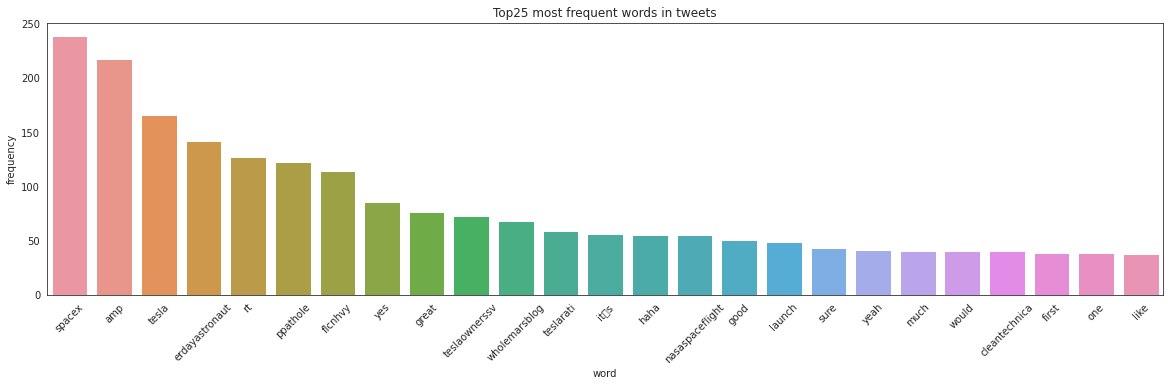

In [ ]:
#word frequency after removal of stopwords,top 25
freq_sw=pd.Series(' '.join(elon_musk_cln['Text']).split()).value_counts()[:25]
freq_sw
freq_swdf=pd.DataFrame(freq_sw).reset_index()
freq_swdf.rename(columns={'index':'word',0:'frequency'},inplace=True)
plt.figure(figsize=(20,5))
plt.title('Top25 most frequent words in tweets')
sns.barplot('word','frequency',data=freq_swdf)
plt.xticks(rotation=45)

In [ ]:
#count vectorizer tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer=CountVectorizer(min_df=1,max_df=5)
X=vectorizer.fit_transform(elon_musk_cln["Text"])
word_freq_df=pd.DataFrame({'term':vectorizer.get_feature_names(),
                           'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency']=word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [ ]:
word_freq_df.head(25)

,term,occurrences,frequency
0,aber,1,0.000159
1,abo,1,0.000159
2,aboard,1,0.000159
3,abort,3,0.000477
4,absence,1,0.000159
...,...,...,...
20,acceptable,2,0.000318
21,accepted,1,0.000159
22,accessible,1,0.000159
23,accidental,1,0.000159


In [ ]:
#TFIDF -term frequency inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)# 1000 words
doc_vec=vectorizer.fit_transform(elon_musk_cln['Text'])
names_features=vectorizer.get_feature_names()
dense=doc_vec.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=names_features)

In [ ]:
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356769,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##N-gram

In [ ]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) # for tri-gram=(3,3)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
  return words_freq[:n]  

In [ ]:
top2_words=get_top_n2_words(elon_musk_cln['Text'],n=200) #top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=['Bi-gram',"Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13
...,...,...
45,nasaspaceflight bocachicagal,6
46,nasaspaceflight erdayastronaut,6
47,ppathole erdayastronaut,6
48,we ll,6


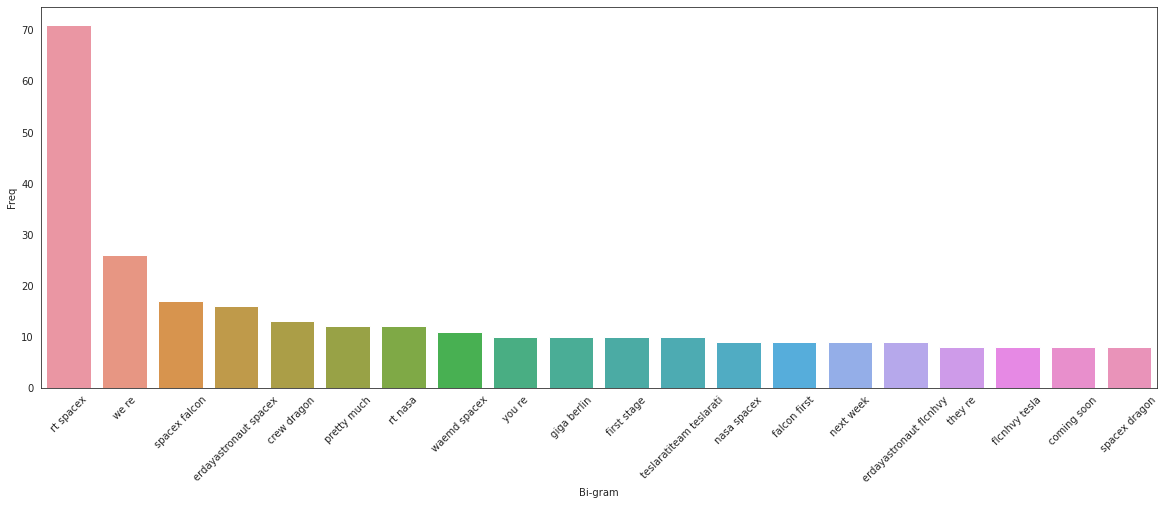

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])
plt.show()

In [ ]:
#Tri-gram
def get_top_n3_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
  return words_freq[:n]  

In [ ]:
top3_words=get_top_n3_words(elon_musk_cln['Text'],n=200) #top 200
top3_df=pd.DataFrame(top3_words)
top3_df.columns=['Tri-gram',"Freq"]
top3_df

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
...,...,...
195,completed full duration,2
196,raptor vacuum engine,2
197,we ve ever,2
198,zogfotpik samiralyateem idaacarmack,2


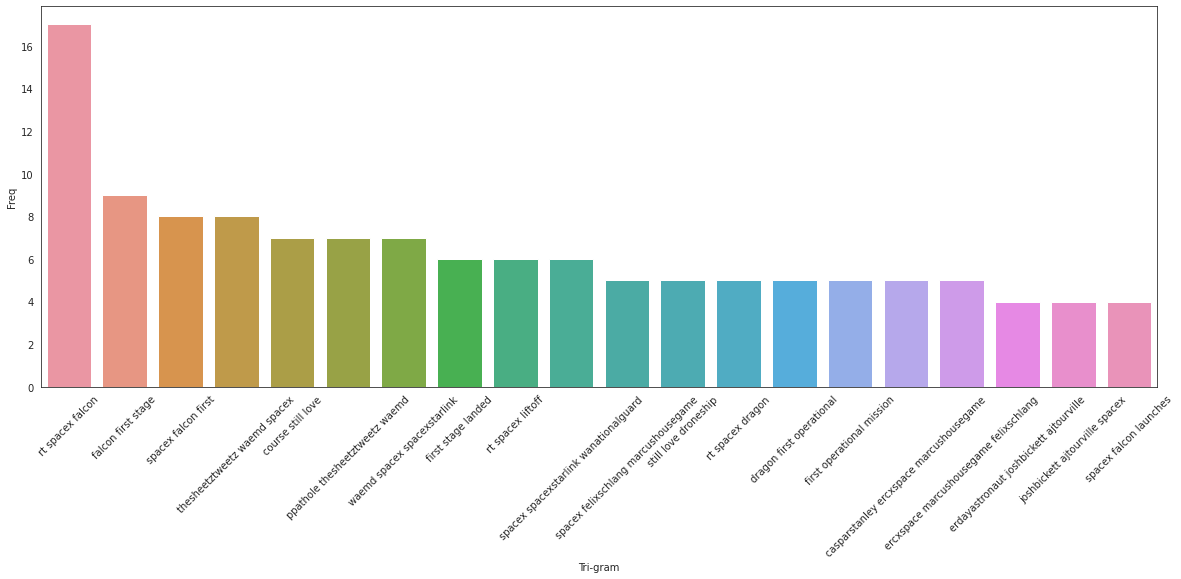

In [ ]:
#Tri-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Tri-gram'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Tri-gram"])
plt.show()

## WordCloud

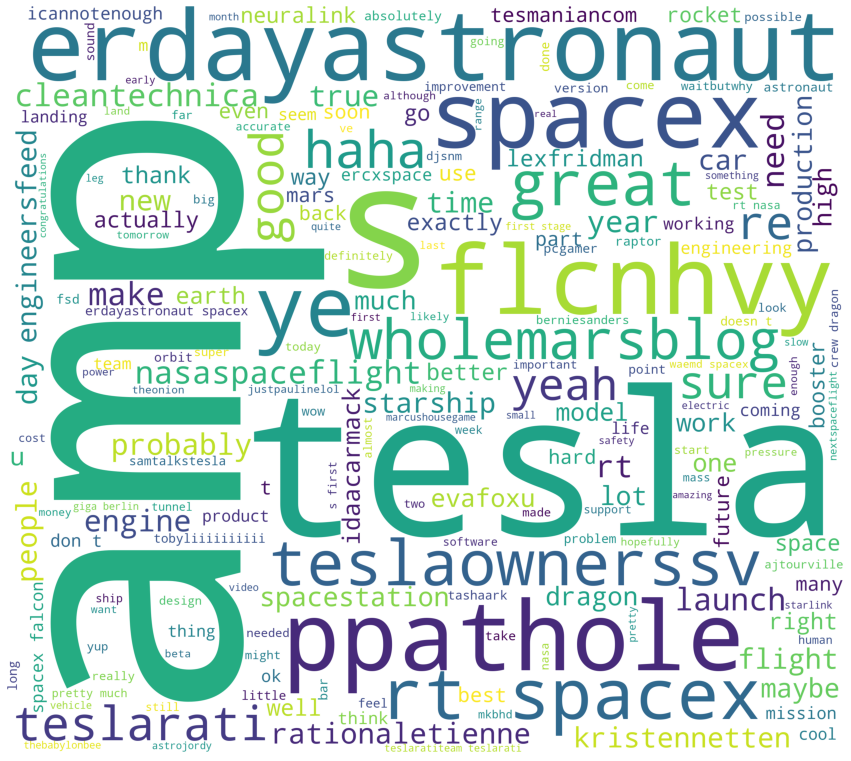

In [ ]:
string_Total=" ".join(elon_musk_cln['Text'])

#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.axis('off')
wordcloud_stw=WordCloud(background_color= 'white',width = 2800,height = 2500).generate(string_Total)
plt.imshow(wordcloud_stw)

## Part of speech tagging

In [ ]:
elon_musk_cln

,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextlevel tried
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing execution last year next even
...,...
1992,flcnhvy true sounds surreal negative propaganda still amp easy find social
1993,ppathole make sure read ur terms amp conditions clicking accept
1994,teslagong ppathole samwise gamgee
1995,ppathole altho dumb dumber


In [ ]:
elon_musk_sen=elon_musk_cln.copy()
elon_musk_sen=[x.strip() for x in elon_musk_sen.Text]# strip for removing lead n tail chars/spaces
elon_musk_sen=[x for x in elon_musk_sen if x]
elon_musk_sen[0:25]

['i\x92m alien',
 'idaacarmack ray tracing cyberpunk hdr nextlevel tried',
 'joerogan spotify great interview',
 'doge underestimated',
 'teslacn congratulations tesla china amazing execution last year next even',
 'happy new year ox',
 'frodo underdoge thought would fail httpstcozgxjfdzzrm',
 'owensparks flcnhvy haha thanks',
 'flcnhvy indeed tweets definitely represent realworld time allocation',
 'entertaining outcome likely',
 'givedirectly sent',
 'agree clubhouse kanyewest',
 'geoffkeighley unrealengine it\x92s getting real',
 'bought dogecoin lil x toddler hodler',
 'joshmanmode definitely issues sentencing seems bit high',
 'freewalletorg thanks fixing',
 'freewalletorg please unlock account',
 'astrojordy',
 'true power haha',
 'freewalletorg crypto wallet won\x92t give private keys avoided costs',
 'freewalletorg app sucks',
 'rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission',
 'ajtourville yes',
 'rationaletienne adamklotz pre

In [ ]:
## part of speech tagging 
# nlp = spacy.load('en)
nlp=spacy.load('en_core_web_sm')

one_block=elon_musk_sen[21]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
one_block

'rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission'

In [ ]:
for token in doc_block[0:20]:
  print(token,token.pos_)

rt PROPN
spacex PROPN
nasa PROPN
selected VERB
falcon NOUN
heavy ADJ
launch NOUN
first ADV
two NUM
elements NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN


##Sentence Scoring

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn (1).csv


In [ ]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
tweet = [x.strip() for x in elon_musk_cln.Text] # remove both the leading and the trailing characters

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Joining the list into one string/text
tweets_text = ' '.join(tweet)
len(tweets_text)

106017

In [ ]:
#Tokenizing
from nltk import tokenize
sentences=tokenize.sent_tokenize(" ".join(tweet))
sentences

['i\x92m alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest  geoffkeighley unrealengine it\x92s getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won\x92t give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly

In [ ]:
#word scores
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
#custom function : score each word in a sentence in lemmatise form,
#but calculated the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'good')

good


3

In [ ]:
elon_musk_cln['sentiment_value']=elon_musk_cln['Text'].apply(calculate_sentiment)

im alien
idaacarmack ray tracing cyberpunk hdr nextlevel tried
joerogan spotify great interview
doge underestimated
teslacn congratulations tesla china amazing execution last year next even
happy new year ox
frodo underdoge thought would fail httpstcozgxjfdzzrm
owensparks flcnhvy haha thanks
flcnhvy indeed tweets definitely represent realworld time allocation
entertaining outcome likely
givedirectly sent
agree clubhouse kanyewest
geoffkeighley unrealengine its getting real
bought dogecoin lil x toddler hodler
joshmanmode definitely issues sentencing seems bit high
freewalletorg thanks fixing
freewalletorg please unlock account
astrojordy
true power haha
freewalletorg crypto wallet wont give private keys avoided costs
freewalletorg app sucks
rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission
ajtourville yes
rationaletienne adamklotz predict cash flow reasonably well starlink ipo
rationaletienne adamklotz starlink staggeringly difficult t

In [ ]:
#word count
elon_musk_cln['word_count']=elon_musk_cln['Text'].str.split().apply(len)
elon_musk_cln['word_count'].head(25)

0      2
1      7
2      4
3      2
4     10
      ..
20     9
21     3
22    15
23     2
24     9
Name: word_count, Length: 25, dtype: int64

In [ ]:
elon_musk_cln.sort_values(by='sentiment_value').tail(10)

,Text,sentiment_value,word_count
1265,cleantechnica make great points important note irons cost advantage partly offset,7,11
1964,nichegamer didnt mind awesome mass effect talking sequels amazing,8,9
1784,flcnhvy yourfavgas ajtourville really want great fun could la austin,8,10
513,spacestation spacex wow station looks amazing,8,6
467,picotjohn cyberpunkgame its good great game imo improving may seem like mere surface detail woul,10,15
457,teslaownerssv get absurdly good tesla aiautopilot engineering awesome theres great ai ther,10,12
1355,great trip germany support government amp people super appreciated,10,9
1170,thanks tesla team great work deliveries new owners super appreciate accommodating us delivery ti httpstcoppzzhxbxgp,10,15
1302,one way another excitement guaranteed support greater boca padre brownsville community much appreciated,11,13
1386,gerberkawasaki wow super loved astronomy took queens penn definitely one favorite class,12,12


In [ ]:
elon_musk_cln.sort_values(by='sentiment_value').head(10)

,Text,sentiment_value,word_count
186,naval tyranny also road hell mostly paved bad intentions,-7,9
1715,neuroskeptic dont fire go several seconds minutes without firing fire several ti,-6,12
1271,tjlk eerie parallels boring company amp vaulttec also built first demonstration tunnelvault la,-6,13
1061,tesladri chananbos wholemarsblog crash absorption rails cut amp replaced bolted part collision repair,-5,13
1391,lvaux kulpability tlowdon ethicalskeptic people extremely unlikely die alone,-5,9
1531,ppathole early investor part tesla wrong bs pushed eberhard worst person ive ever,-5,13
891,pcgamer fear best imo also dead space haunt dreams,-5,9
42,univercurious extremely misleading image doesnt reflect true time cost people rain amp pain,-5,13
1572,universalsci asteroid impact risk well understood comets worry,-5,8
1973,rationaletienne flcnhvy ppathole ihearttesla death loss information,-5,7


In [ ]:
#sentiment score of the whole review
elon_musk_cln['sentiment_value'].describe()

count    1997.000000
mean        0.760641
std         1.810621
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [ ]:
# negative sentiment score of the whole review
elon_musk_cln[elon_musk_cln['sentiment_value']<0]

,Text,sentiment_value,word_count
3,doge underestimated,-1,2
6,frodo underdoge thought would fail httpstcozgxjfdzzrm,-2,6
15,joshmanmode definitely issues sentencing seems bit high,-2,7
20,freewalletorg crypto wallet wont give private keys avoided costs,-1,9
21,freewalletorg app sucks,-3,3
...,...,...,...
1974,flcnhvy ppathole ihearttesla earning power post augmentation would easily pay that httpstcobpzwersoys,-1,12
1988,kenyanwalstreet actually payout vesting stock options may never pay stock cant b,-1,12
1989,ihearttesla easy way answer tweet helping dire brain injuries first priority details aug,-2,13
1992,flcnhvy true sounds surreal negative propaganda still amp easy find social,-3,11


In [ ]:
elon_musk_cln[elon_musk_cln['sentiment_value']==0]

,Text,sentiment_value,word_count
0,im alien,0,2
1,idaacarmack ray tracing cyberpunk hdr nextlevel tried,0,7
8,flcnhvy indeed tweets definitely represent realworld time allocation,0,8
10,givedirectly sent,0,2
12,,0,0
...,...,...,...
1981,evafoxu tesla berlin model one watch revolution automotive body engineering finally,0,11
1982,burakaydik true,0,2
1990,ai symbiosis u wait,0,4
1991,flcnhvy theres,0,2


In [ ]:
elon_musk_cln[elon_musk_cln['sentiment_value']>0]

,Text,sentiment_value,word_count
2,joerogan spotify great interview,3,4
4,teslacn congratulations tesla china amazing execution last year next even,6,10
5,happy new year ox,3,4
7,owensparks flcnhvy haha thanks,5,4
9,entertaining outcome likely,2,3
...,...,...,...
1985,ppathole ihearttesla sure great amp terrifying everything weve ever sensed thought,3,11
1986,redmercy yes,1,2
1987,buzzindelhi sorry hopefully soon,1,4
1993,ppathole make sure read ur terms amp conditions clicking accept,1,10


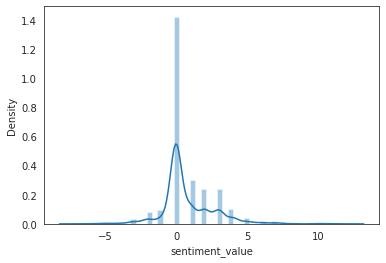

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='white')
sns.distplot(elon_musk_cln['sentiment_value'])
plt.show()

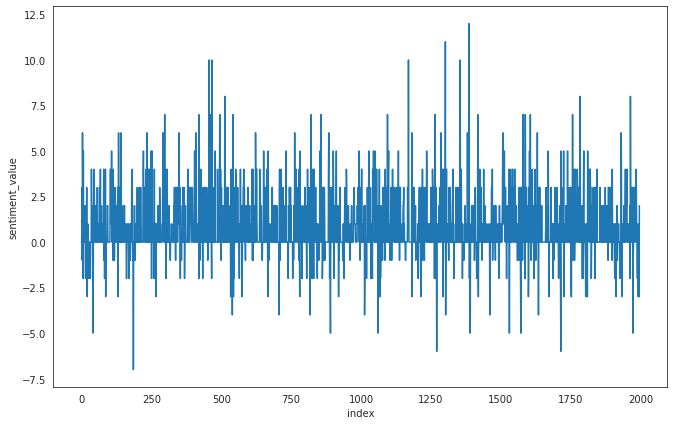

In [ ]:
elontweets_line=elon_musk_cln.copy()
elontweets_line['index']=range(0,len(elontweets_line))
plt.figure(figsize=(11,7))
sns.lineplot(y='sentiment_value',x='index',data=elontweets_line)

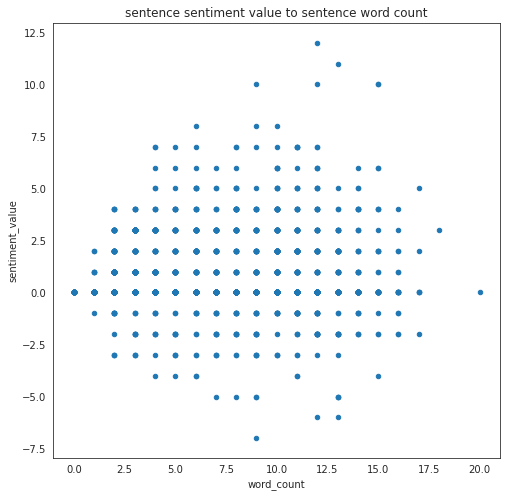

In [ ]:
elontweets_line.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='sentence sentiment value to sentence word count')

##Subjectivity and Polarity

In [ ]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [ ]:
# Adding features Subjectivity & Polarity to dataset
elon_musk_cln[["subjectivity", "polarity"]] = elon_musk_cln.apply(sentiment_analysis, axis=1)
elon_musk_cln.head(25)


,Text,sentiment_value,word_count,subjectivity,polarity
0,im alien,0,2,0.750000,-0.250
1,idaacarmack ray tracing cyberpunk hdr nextlevel tried,0,7,0.000000,0.000
2,joerogan spotify great interview,3,4,0.750000,0.800
3,doge underestimated,-1,2,0.000000,0.000
4,teslacn congratulations tesla china amazing execution last year next even,6,10,0.322222,0.200
...,...,...,...,...,...
20,freewalletorg crypto wallet wont give private keys avoided costs,-1,9,0.375000,0.000
21,freewalletorg app sucks,-3,3,0.300000,-0.300
22,rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission,0,15,0.416667,0.025
23,ajtourville yes,1,2,0.000000,0.000


In [ ]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
elon_tweets=elon_musk_cln.copy()
elon_tweets["tweet_kind"] = elon_tweets["polarity"].apply(analysis)
elon_tweets

,Text,sentiment_value,word_count,subjectivity,polarity,tweet_kind
0,im alien,0,2,0.750000,-0.250000,Negative
1,idaacarmack ray tracing cyberpunk hdr nextlevel tried,0,7,0.000000,0.000000,Neutral
2,joerogan spotify great interview,3,4,0.750000,0.800000,Positive
3,doge underestimated,-1,2,0.000000,0.000000,Neutral
4,teslacn congratulations tesla china amazing execution last year next even,6,10,0.322222,0.200000,Positive
...,...,...,...,...,...,...
1992,flcnhvy true sounds surreal negative propaganda still amp easy find social,-3,11,0.508333,0.111111,Positive
1993,ppathole make sure read ur terms amp conditions clicking accept,1,10,0.888889,0.500000,Positive
1994,teslagong ppathole samwise gamgee,0,4,0.000000,0.000000,Neutral
1995,ppathole altho dumb dumber,-3,4,0.500000,-0.375000,Negative


In [ ]:
elon_tweets.describe()

,sentiment_value,word_count,subjectivity,polarity
count,1997.000000,1997.000000,1997.000000,1997.000000
mean,0.760641,6.715073,0.311290,0.122350
std,1.810621,4.068112,0.327634,0.259052
min,-7.000000,0.000000,0.000000,-1.000000
25%,0.000000,3.000000,0.000000,0.000000
50%,0.000000,6.000000,0.250000,0.000000
75%,2.000000,10.000000,0.566667,0.238889
max,12.000000,20.000000,1.000000,1.000000


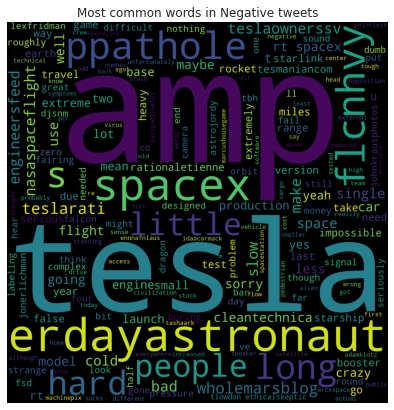

In [ ]:
#Negative tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(elon_tweets.loc[elon_tweets['tweet_kind']=='Negative','Text'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Negative tweets")
plt.axis('off')
plt.show()

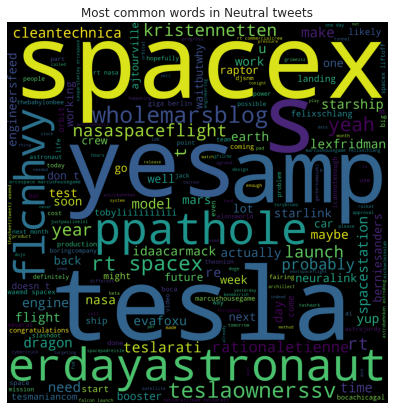

In [ ]:
#Neutral tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(elon_tweets.loc[elon_tweets['tweet_kind']=='Neutral','Text'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Neutral tweets")
plt.axis('off')
plt.show()

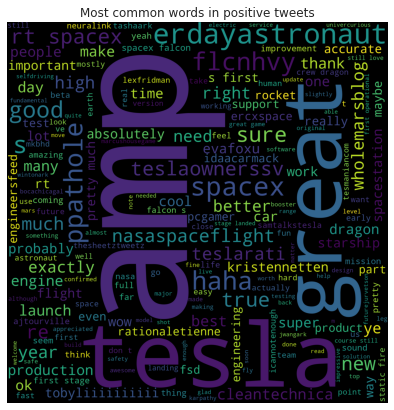

In [ ]:
#positive tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(elon_tweets.loc[elon_tweets['tweet_kind']=='Positive','Text'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in positive tweets")
plt.axis('off')
plt.show()

# Conclusion:

In [ ]:
elon_tweets['tweet_kind'].value_counts()

Neutral     960
Positive    838
Negative    199
Name: tweet_kind, dtype: int64

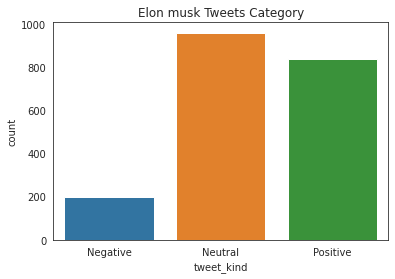

In [ ]:
sns.countplot(elon_tweets['tweet_kind']).set_title("Elon musk Tweets Category")
plt.show()

*  There are more neutral reviews than the positive and negative reviews

#Problem-2)

*  Extract reviews of any product from ecommerce website like amazon

*  Perform emotion mining



#Solution:

In [ ]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup
#from selenium import webdriver

## Taking TITAN WATCH reviews from amazon for performing emotion mining

In [ ]:
titan_watch=[]
for i in range (1,63):
    watch=[]
    url="https://www.amazon.in/Titan-Analog-Blue-Dial-Watch-1766SL03/product-reviews/B07DD2KBXV/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response=requests.get(url)
    soup=BeautifulSoup(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        watch.append(reviews[i].text)
    titan_watch=titan_watch+watch   

In [ ]:
len(titan_watch)

129

In [ ]:
titan_watch

['\nIt a nice watch. But the band is hard a bit. The strip holder come out aftr 1 month due to hard strap.\n',
 '\nNice product. can go for purchase but value is high it can be bought under 2800. Thnks\n',
 "\nThe watch looks good.Works completely fine.It's comfortable.One should go for it with eyes closed.\n",
 '\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n',
 '\nNice watch, Titan is always best.\n',
 '\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0Like\n',
 '\nHaving a handsome look and  very good quality.\n',
 '\nWatch Is Awesome But Packaging is Bad, Watch box was broken but watch was good, value for money and light weight.\n',
 '\nEverything good nice perfect\n',
 '\nBest for gifting, I gifted to my husband and he is happy from the product\n',
 "\nIt's Good...value for money on discounts\n",
 '\nThe product is very bad it is not working properly some time some time it is being stop.\n',
 '\nIts reall

##Basic,EDA and Text cleanig

In [ ]:
titan=pd.DataFrame.from_dict({"review":titan_watch})
pd.set_option('max_colwidth',500)

titan

,review
0,\nIt a nice watch. But the band is hard a bit. The strip holder come out aftr 1 month due to hard strap.\n
1,\nNice product. can go for purchase but value is high it can be bought under 2800. Thnks\n
2,\nThe watch looks good.Works completely fine.It's comfortable.One should go for it with eyes closed.\n
3,\n\n\n\n\n The media could not be loaded.\n \n\n\n
4,"\nNice watch, Titan is always best.\n"
...,...
124,\nAll are like. Date Day 24hr\n
125,\nGot a better option somewhere else\n
126,\nLovely watch\n
127,\nGood watch value for money\n


In [ ]:
titan.shape

(129, 1)

In [ ]:
titan['review'].isnull().sum()

0

In [ ]:
titan.duplicated().value_counts()

False    110
True      19
dtype: int64

In [ ]:
def deemojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [ ]:
#regular expression
import re 
import string

def clean_text(text):
  text=text.lower()
  text=deemojify(text)
  text=re.sub('\[.*?-,\]','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub("[0-9" "]+"," ",text)
  text=re.sub('[‘’“”…]','',text)
  return text

clean=lambda x:clean_text(x)

In [ ]:
titan_cln=titan.copy()
titan_cln['review']=titan_cln.review.apply(clean)
titan_cln

,review
0,\nit a nice watch but the band is hard a bit the strip holder come out aftr month due to hard strap\n
1,\nnice product can go for purchase but value is high it can be bought under thnks\n
2,\nthe watch looks goodworks completely fineits comfortableone should go for it with eyes closed\n
3,\n\n\n\n\n the media could not be loaded\n \n\n\n
4,\nnice watch titan is always best\n
...,...
124,\nall are like date day \n
125,\ngot a better option somewhere else\n
126,\nlovely watch\n
127,\ngood watch value for money\n


In [ ]:
#removing stop words
titan_nosw=titan_cln.copy()
titan_nosw['review']=titan_nosw['review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
titan_nosw.head()

,review
0,nice watch band hard bit strip holder come aftr month due hard strap
1,nice product go purchase value high bought thnks
2,watch looks goodworks completely fineits comfortableone go eyes closed
3,media could loaded
4,nice watch titan always best


In [ ]:
#word frequency
#top 20
freq1=pd.Series(''.join(titan_nosw['review']).split()).value_counts()[:25]
freq1

watch         28
product       17
good          13
titan          7
time           7
              ..
registance     3
worth          3
watchgood      3
return         3
strap          3
Length: 25, dtype: int64

In [ ]:
#count vectorizer tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer1=CountVectorizer(min_df=1,max_df=5)
X1=vectorizer1.fit_transform(titan_nosw["review"])
word_freq_df1=pd.DataFrame({'term':vectorizer1.get_feature_names(),
                           'occurrences':np.asarray(X1.sum(axis=0)).ravel().tolist()})
word_freq_df1['frequency']=word_freq_df1['occurrences']/np.sum(word_freq_df1['occurrences'])

In [ ]:
word_freq_df1.head(25)

,term,occurrences,frequency
0,absolutely,1,0.002924
1,actually,2,0.005848
2,affordable,1,0.002924
3,aftr,1,0.002924
4,along,1,0.002924
...,...,...,...
20,body,1,0.002924
21,bought,4,0.011696
22,box,1,0.002924
23,brand,1,0.002924


In [ ]:
#TFIDF -term frequency inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)# 1000 words
doc_vec2=vectorizer2.fit_transform(titan_nosw['review'])
names_features2=vectorizer2.get_feature_names()
dense2=doc_vec2.todense()
denselist2=dense2.tolist()
df2=pd.DataFrame(denselist2,columns=names_features2)

In [ ]:
df2

,absolutely,actually,affordable,aftr,amazing,amazon,amazonits,annoying,automaticly,average,...,wear,wearlooks,wedding,weight,wonderful,wore,working,worth,wow,wrists
0,0.0,0.0,0.0,0.295798,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## N-gram

In [ ]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) # for tri-gram=(3,3)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
  return words_freq[:n] 

In [ ]:
top2_words=get_top_n2_words(titan['review'],n=200) #top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=['Bi-gram',"Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,very good,10
1,nice product,9
2,nice watch,7
3,value for,7
4,for money,7
...,...,...
45,from the,2
46,is very,2
47,is not,2
48,some time,2


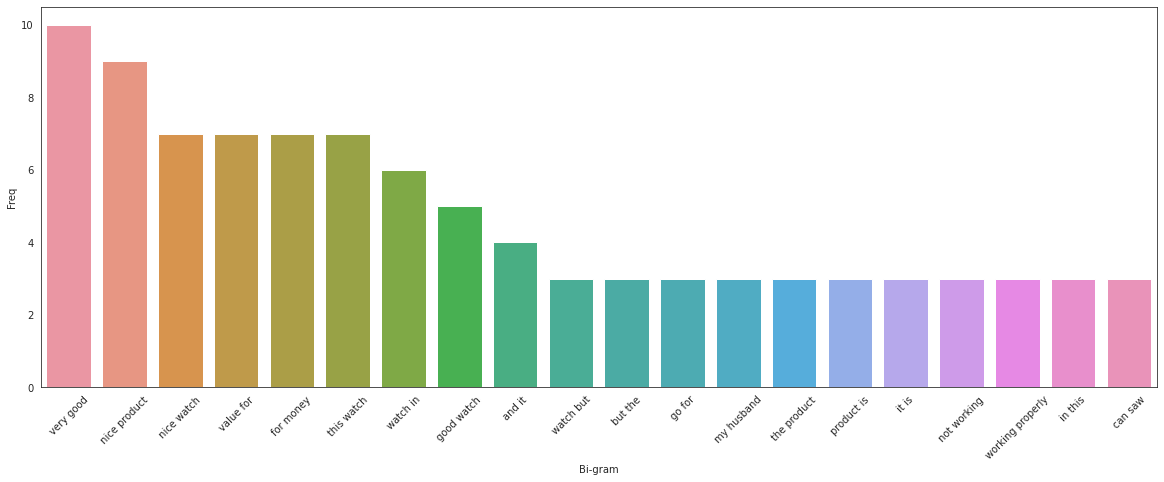

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])
plt.show()

In [ ]:
#Tri-gram
def get_top_n3_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
  return words_freq[:n]  

In [ ]:
top3_words=get_top_n3_words(titan_nosw['review'],n=200) #top 200
top3_df=pd.DataFrame(top3_words)
top3_df.columns=['Tri-gram',"Freq"]
top3_df

,Tri-gram,Freq
0,media could loaded,2
1,good watch value,2
2,watch value money,2
3,nice watch band,1
4,watch band hard,1
...,...,...
195,quality broke days,1
196,broke days use,1
197,nyc watch like,1
198,watch like product,1


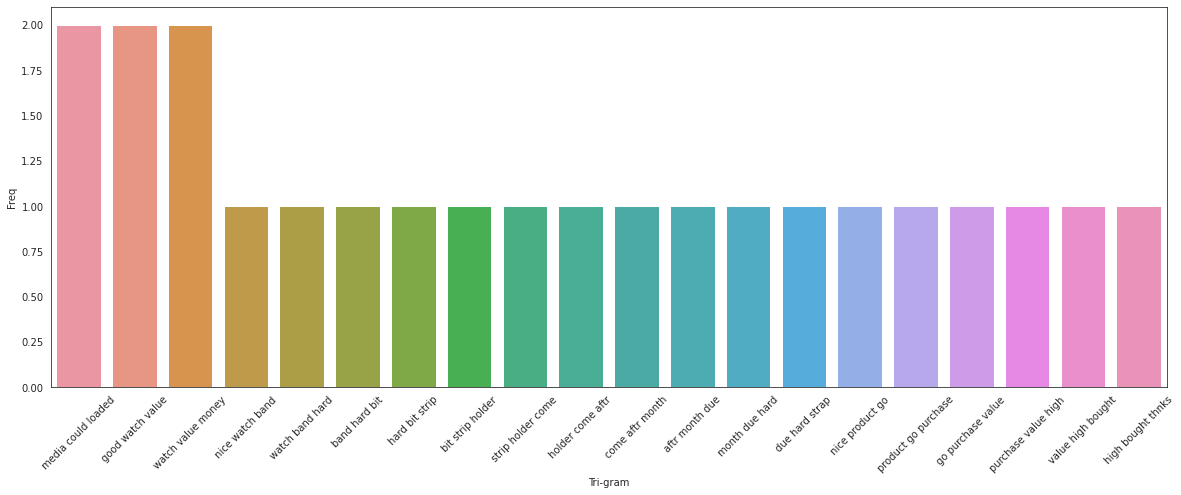

In [ ]:
#Tri-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Tri-gram'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Tri-gram"])
plt.show()

## wordcloud

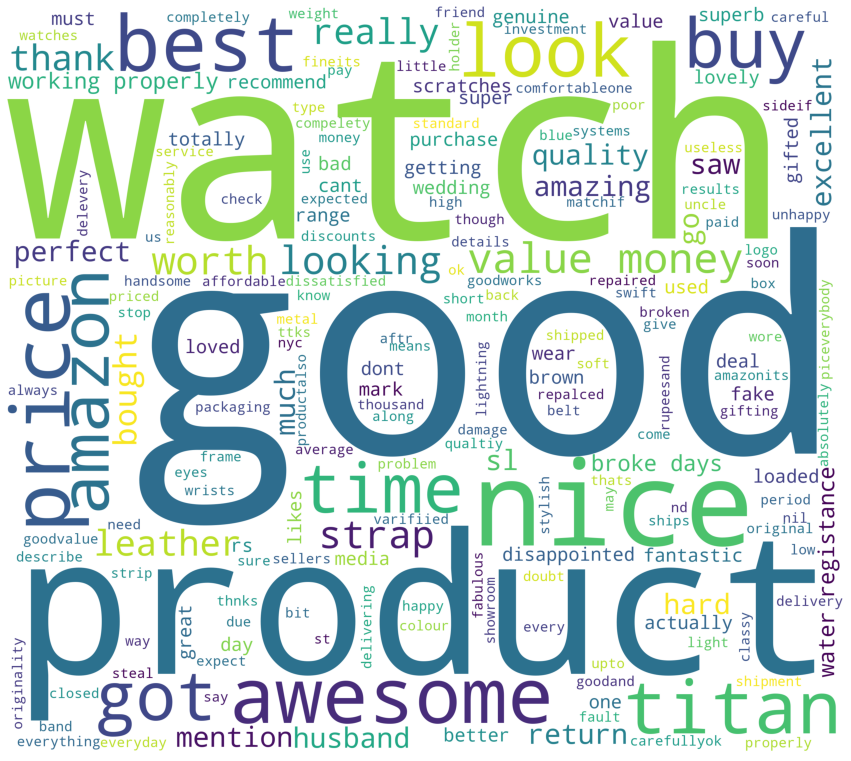

In [ ]:
string_Total=" ".join(titan_nosw['review'])

#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.axis('off')
wordcloud_stw=WordCloud(background_color= 'white',width = 2800,height = 2500).generate(string_Total)
plt.imshow(wordcloud_stw)

## Part of speech tagging

In [ ]:
titan_sen=titan_nosw.copy()
titan_sen=[x.strip() for x in titan_sen.review]# strip for removing lead n tail chars/spaces
titan_sen=[x for x in titan_sen if x]
titan_sen[0:25]

['nice watch band hard bit strip holder come aftr month due hard strap',
 'nice product go purchase value high bought thnks',
 'watch looks goodworks completely fineits comfortableone go eyes closed',
 'media could loaded',
 'nice watch titan always best',
 'media could loaded like',
 'handsome look good quality',
 'watch awesome packaging bad watch box broken watch good value money light weight',
 'everything good nice perfect',
 'best gifting gifted husband happy product',
 'goodvalue money discounts',
 'product bad working properly time time stop',
 'really good watch range getting titan watch much price really good would recommend watch',
 'give us used repaired watches st time saw problem watch repalced time cant saw fault means scratches used watch saw scratches frame return period careful check every product properly pay thousand rupeesand nd cant expect amazon titan also',
 'mention water registance though titan describe details water registance products mark back metal sideif 

In [ ]:
## part of speech tagging 
# nlp = spacy.load('en)
nlp=spacy.load('en_core_web_sm')

one_block=titan_sen[11]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
one_block

'product bad working properly time time stop'

In [ ]:
for token in doc_block[0:20]:
  print(token,token.pos_)

product NOUN
bad ADJ
working VERB
properly ADV
time NOUN
time NOUN
stop VERB


In [ ]:
# filetring for nouns & verbs 
nouns_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[5:25])

[]


In [ ]:
nlp=spacy.load('en_core_web_sm')

one_block=titan_sen[21]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
one_block

'nice watch leather may got damage soon'

In [ ]:
for token in doc_block[0:20]:
  print(token,token.pos_)

nice ADJ
watch NOUN
leather NOUN
may AUX
got VERB
damage NOUN
soon ADV


In [ ]:
# filetring for nouns & verbs 
nouns_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[5:25])

[]


In [ ]:
import nltk
nltk.download('punkt')
text=" ".join(titan_nosw["review"])
text_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
text_tokens[:20]

['nice',
 'watch',
 'band',
 'hard',
 'bit',
 'strip',
 'holder',
 'come',
 'aftr',
 'month',
 'due',
 'hard',
 'strap',
 'nice',
 'product',
 'go',
 'purchase',
 'value',
 'high',
 'bought']

In [ ]:
len(text_tokens)

581

## Sentence Scoring

In [ ]:
#custom function : score each word in a sentence in lemmatise form,
#but calculated the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [ ]:
titan_nosw['sentiment_value']=titan_nosw['review'].apply(calculate_sentiment)

nice watch band hard bit strip holder come aftr month due hard strap
nice product go purchase value high bought thnks
watch looks goodworks completely fineits comfortableone go eyes closed
media could loaded
nice watch titan always best
media could loaded like
handsome look good quality
watch awesome packaging bad watch box broken watch good value money light weight
everything good nice perfect
best gifting gifted husband happy product
goodvalue money discounts
product bad working properly time time stop
really good watch range getting titan watch much price really good would recommend watch
give us used repaired watches st time saw problem watch repalced time cant saw fault means scratches used watch saw scratches frame return period careful check every product properly pay thousand rupeesand nd cant expect amazon titan also
mention water registance though titan describe details water registance products mark back metal sideif water registance return buy product systems goodand mentio

In [ ]:
#word count
titan_nosw['word_count']=titan_nosw['review'].str.split().apply(len)
titan_nosw['word_count'].head(25)

0     13
1      8
2      9
3      3
4      5
      ..
20     2
21     2
22     7
23     1
24     1
Name: word_count, Length: 25, dtype: int64

In [ ]:
titan_nosw.sort_values(by='sentiment_value').tail(15)

,review,sentiment_value,word_count
82,nice watch reasonable price good buy,6,6
41,best watch buy price range brown leather strap looking nice genuine product varifiied titan showroom,6,15
55,nice watch good price,6,4
68,best good pricing,6,3
39,nice product piceverybody likes ttks amazon delivering original productalso swift delivery,7,11
...,...,...,...
16,thanks amazonits really amazing bought uncle loved,9,7
8,everything good nice perfect,9,4
116,wow superb,9,2
31,awesome watch everyday wear blue colour along brown strap looks good bought rs totally worth price,9,16


In [ ]:
titan_nosw.sort_values(by='sentiment_value').head(10)

,review,sentiment_value,word_count
11,product bad working properly time time stop,-4,7
38,little disappointed belt hard short upto mark,-3,7
19,product good amazon ships product working properly unhappy service product shipped amazon useless working properly compelety dissatisfied type sellers product shipment,-3,21
118,guys totally copy titan fake product requested return time body came pic,-3,12
79,got fake product dont buy,-3,5
27,leather strap watch poor quality broke days use,-2,8
18,paid watch got broke days wear disappointed actually gifted watch husband results worth buy sure,-2,15
13,give us used repaired watches st time saw problem watch repalced time cant saw fault means scratches used watch saw scratches frame return period careful check every product properly pay thousand rupeesand nd cant expect amazon titan also,-1,38
113,receiving dead products thank amazon,-1,5
86,gghhb,0,1


In [ ]:
#sentiment score of the whole review
titan_nosw['sentiment_value'].describe()

count    129.000000
mean       2.790698
std        2.536220
min       -4.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [ ]:
titan_nosw[titan_nosw['sentiment_value']<0]

,review,sentiment_value,word_count
11,product bad working properly time time stop,-4,7
13,give us used repaired watches st time saw problem watch repalced time cant saw fault means scratches used watch saw scratches frame return period careful check every product properly pay thousand rupeesand nd cant expect amazon titan also,-1,38
18,paid watch got broke days wear disappointed actually gifted watch husband results worth buy sure,-2,15
19,product good amazon ships product working properly unhappy service product shipped amazon useless working properly compelety dissatisfied type sellers product shipment,-3,21
27,leather strap watch poor quality broke days use,-2,8
38,little disappointed belt hard short upto mark,-3,7
79,got fake product dont buy,-3,5
113,receiving dead products thank amazon,-1,5
118,guys totally copy titan fake product requested return time body came pic,-3,12


In [ ]:
titan_nosw[titan_nosw['sentiment_value']>0]

,review,sentiment_value,word_count
0,nice watch band hard bit strip holder come aftr month due hard strap,1,13
1,nice product go purchase value high bought thnks,3,8
4,nice watch titan always best,3,5
5,media could loaded like,2,4
6,handsome look good quality,3,4
...,...,...,...
123,good,3,1
124,like date day,2,3
126,lovely watch,3,2
127,good watch value money,3,4


In [ ]:
titan_nosw[titan_nosw['sentiment_value']==0]

,review,sentiment_value,word_count
2,watch looks goodworks completely fineits comfortableone go eyes closed,0,9
3,media could loaded,0,3
10,goodvalue money discounts,0,3
14,,0,0
15,mention water registance though titan describe details water registance products mark back metal sideif water registance return buy product systems goodand mention sl watch getting sl logo thats matchif sl watch mention dont know purchase carefullyok,0,36
...,...,...,...
73,value money,0,2
86,gghhb,0,1
114,strap broke days,0,3
122,per expectations,0,2


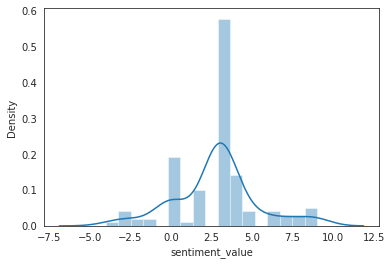

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='white')
sns.distplot(titan_nosw['sentiment_value'])
plt.show()

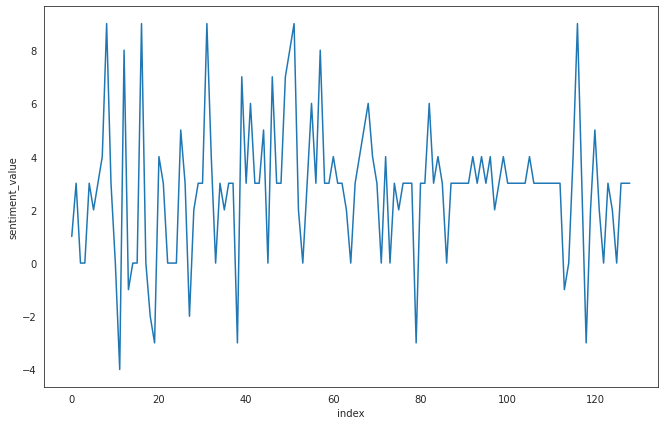

In [ ]:
titan_line=titan_nosw.copy()
titan_line['index']=range(0,len(titan_line))
plt.figure(figsize=(11,7))
sns.lineplot(y='sentiment_value',x='index',data=titan_line)

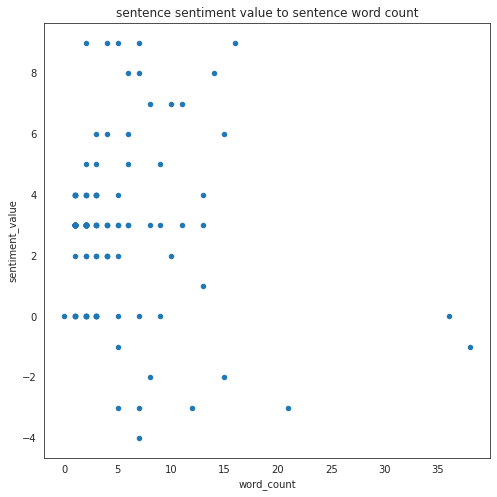

In [ ]:
titan_line.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='sentence sentiment value to sentence word count')

##Subjectivity & Polarity

In [ ]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [ ]:
# Adding features Subjectivity & Polarity to dataset
titan_sbpt=titan_nosw.copy()
titan_sbpt[["subjectivity", "polarity"]] = elon_musk_cln.apply(sentiment_analysis, axis=1)
titan_sbpt.head(25)

,review,sentiment_value,word_count,subjectivity,polarity
0,nice watch band hard bit strip holder come aftr month due hard strap,1,13,0.750000,-0.250
1,nice product go purchase value high bought thnks,3,8,0.000000,0.000
2,watch looks goodworks completely fineits comfortableone go eyes closed,0,9,0.750000,0.800
3,media could loaded,0,3,0.000000,0.000
4,nice watch titan always best,3,5,0.322222,0.200
...,...,...,...,...,...
20,amazing watch,4,2,0.375000,0.000
21,good looking,3,2,0.300000,-0.300
22,nice watch leather may got damage soon,0,7,0.416667,0.025
23,average,0,1,0.000000,0.000


In [ ]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
titan_sbpt["review_kind"] = titan_sbpt["polarity"].apply(analysis)
titan_sbpt

,review,sentiment_value,word_count,subjectivity,polarity,review_kind
0,nice watch band hard bit strip holder come aftr month due hard strap,1,13,0.750000,-0.250,Negative
1,nice product go purchase value high bought thnks,3,8,0.000000,0.000,Neutral
2,watch looks goodworks completely fineits comfortableone go eyes closed,0,9,0.750000,0.800,Positive
3,media could loaded,0,3,0.000000,0.000,Neutral
4,nice watch titan always best,3,5,0.322222,0.200,Positive
...,...,...,...,...,...,...
124,like date day,2,3,0.000000,0.000,Neutral
125,got better option somewhere else,0,5,0.000000,0.000,Neutral
126,lovely watch,3,2,0.769444,0.425,Positive
127,good watch value money,3,4,0.000000,0.000,Neutral


In [ ]:
titan_sbpt.describe()

,sentiment_value,word_count,subjectivity,polarity
count,129.000000,129.000000,129.000000,129.000000
mean,2.790698,4.503876,0.269247,0.091729
std,2.536220,5.627949,0.334272,0.228527
min,-4.000000,0.000000,0.000000,-0.500000
25%,2.000000,1.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000
75%,4.000000,5.000000,0.540000,0.183333
max,9.000000,38.000000,1.000000,0.850000


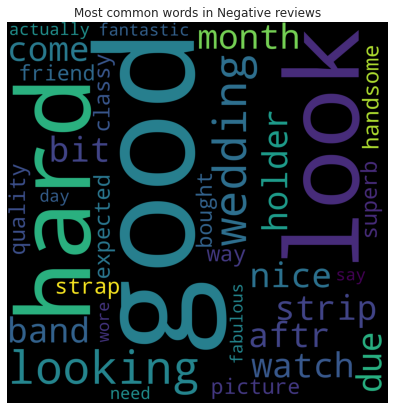

In [ ]:
#Negative tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(titan_sbpt.loc[titan_sbpt['review_kind']=='Negative','review'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Negative reviews")
plt.axis('off')
plt.show()

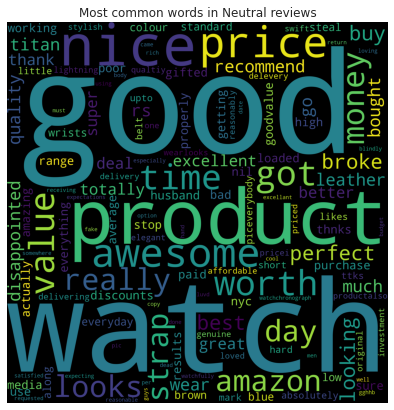

In [ ]:
#neutral tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(titan_sbpt.loc[titan_sbpt['review_kind']=='Neutral','review'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Neutral reviews")
plt.axis('off')
plt.show()

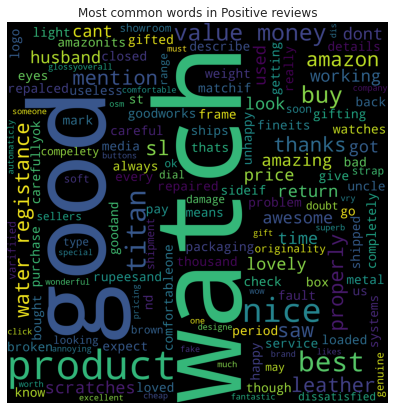

In [ ]:
#positive tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(titan_sbpt.loc[titan_sbpt['review_kind']=='Positive','review'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Positive reviews")
plt.axis('off')
plt.show()

#Conclusion:

In [ ]:
titan_sbpt['review_kind'].value_counts()

Neutral     76
Positive    44
Negative     9
Name: review_kind, dtype: int64

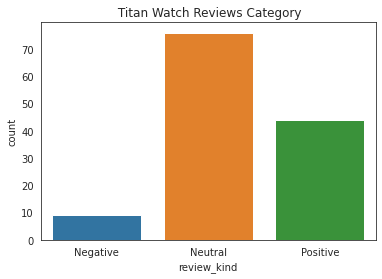

In [ ]:
sns.countplot(titan_sbpt['review_kind']).set_title(" Titan Watch Reviews Category")
plt.show()

*  There are more neutral reviews than the positive and negative reviews.



---
<center> THANK YOU


---


